In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer

import pymc3 as pm

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# %matplotlib notebook
mpl.rcParams['figure.dpi'] = 100
mpl.style.use('ggplot')

In [3]:
df = pd.read_csv('./data/exercise.csv').drop('User_ID', axis=1)

In [4]:
gender_binarizer = LabelBinarizer()
gender_binarizer.fit(df['Gender'])
df['Gender'] = gender_binarizer.transform(df['Gender'])

## Univariate Analysis

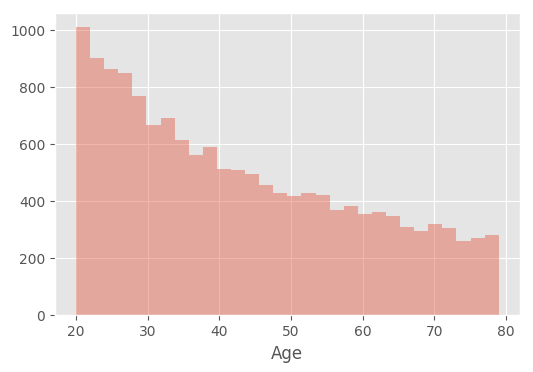

In [5]:
sns.distplot(df['Age'], bins=30, hist=True, norm_hist=False, kde=False)

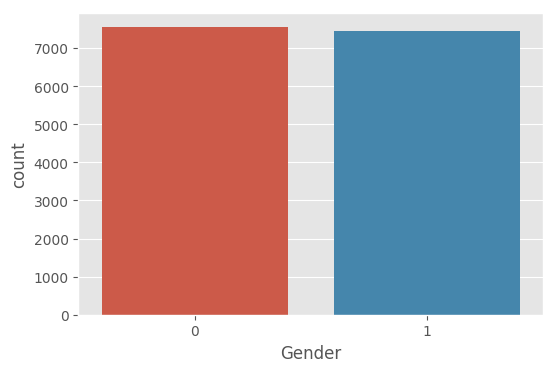

In [6]:
sns.countplot(df['Gender'])

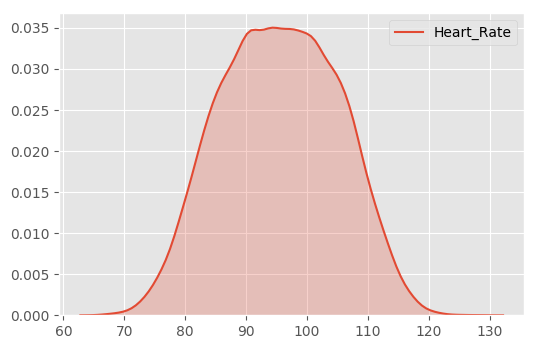

In [7]:
sns.kdeplot(df['Heart_Rate'], shade=True)

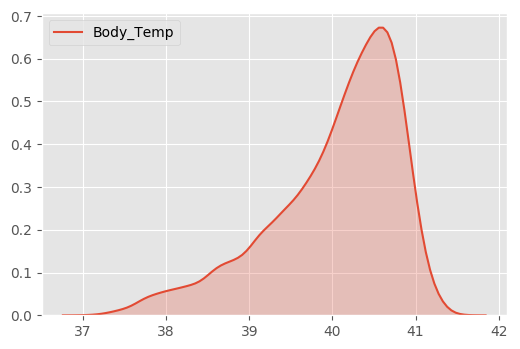

In [8]:
sns.kdeplot(df['Body_Temp'], shade=True)

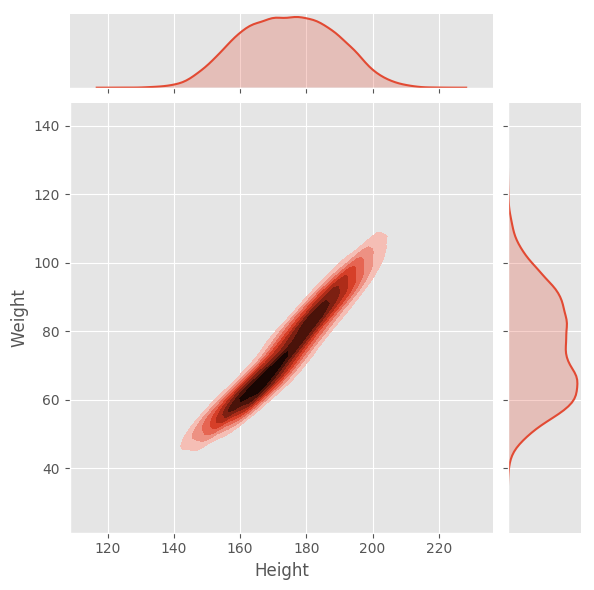

In [9]:
sns.jointplot(x="Height", y="Weight", data=df, kind="kde", shade_lowest=False);

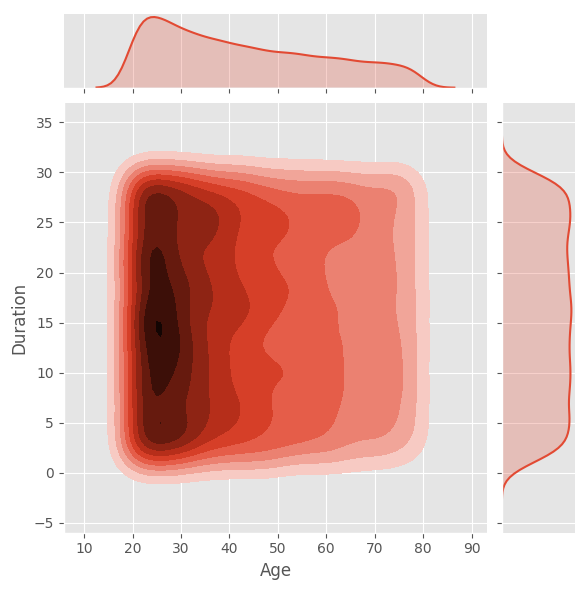

In [15]:
sns.jointplot(x="Age", y="Duration", data=df, kind="kde", shade_lowest=False);

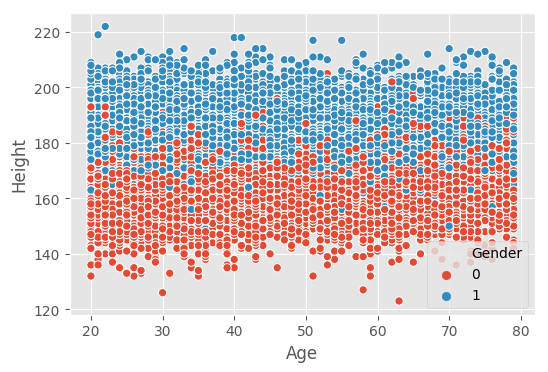

In [10]:
sns.scatterplot(x='Age', y='Height', hue='Gender', data=df)

Text(0.5, 0, 'Duration')

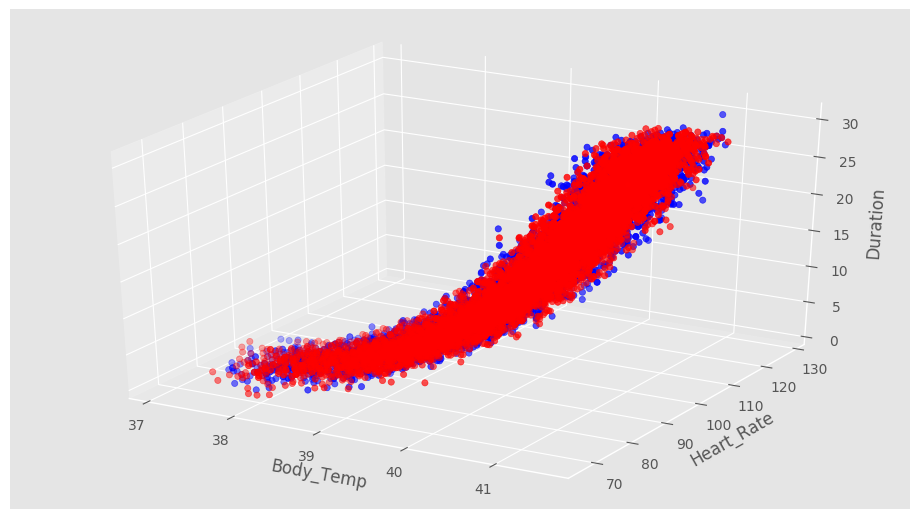

In [11]:
fig = plt.figure(figsize=(9, 5))
ax = Axes3D(fig)
ax.scatter(df.loc[df['Gender'] == 1, 'Body_Temp'], df.loc[df['Gender'] == 1, 'Heart_Rate'], df.loc[df['Gender'] == 1, 'Duration'], color='b')
ax.scatter(df.loc[df['Gender'] == 0, 'Body_Temp'], df.loc[df['Gender'] == 0, 'Heart_Rate'], df.loc[df['Gender'] == 0, 'Duration'], color='red')
ax.set_xlabel('Body_Temp')
ax.set_ylabel('Heart_Rate')
ax.set_zlabel('Duration')

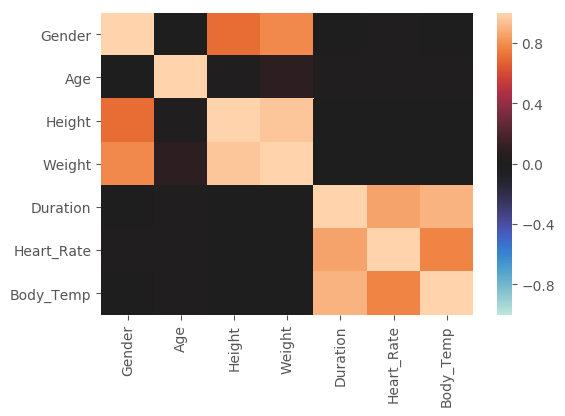

In [13]:
sns.heatmap(df.corr(), cmap='icefire', vmin=-1, vmax=1)

## Modelling

In [14]:
X_train = df.loc[:, df.columns.difference(['Heart_Rate'])]
y_train = df.loc[:, ['Heart_Rate']]

In [15]:
blr = pm.Model()
with blr:
    intercept = pm.Normal('intercept', mu=0, sd=10)
    θ_vector = pm.Normal('θ', mu=0, sd=10, shape=X_train.shape[1])
    μ = intercept + pm.math.dot(X_train, θ_vector[:, np.newaxis])
    σ = pm.HalfNormal('σ', sd=10)
    # assuming heart_rate, y ~ N(intercept + Xθ, σ)
    y_obs = pm.Normal('heart_rate', mu=μ, sd=σ, observed=y_train)

## analytical: maximum likelihood

## analytical: maximum-a-posteriori (gaussian prior)

## analytical: bayesian (gaussian prior)

## approximate: maximum-a-posteriori

## analytical: bayesian (gaussian prior)

In [16]:
with blr:
    map_estimates = pm.find_MAP()

logp = -45,587, ||grad|| = 39.325: 100%|██████████| 57/57 [00:00<00:00, 630.80it/s]  


In [17]:
map_estimates

{'intercept': array(0.05041197),
 'θ': array([ 1.80177837e-03,  1.98367860e+00,  8.15981345e-01,  5.50726834e-02,
         2.85395804e-02, -2.25618990e-02]),
 'σ_log__': array(1.61849172),
 'σ': array(5.0454746)}

In [ ]:
with pm.Model():
    intercept = pm.Normal('intercept', mu=0, sd=10)
    θ_vector = pm.Normal('θ', mu=0, sd=10, shape=X_train.shape[1])
    μ = intercept + pm.math.dot(X_train, θ_vector[:, np.newaxis])
    σ = pm.HalfNormal('σ', sd=10)
    # assuming heart_rate, y ~ N(intercept + Xθ, σ)
    y_obs = pm.Normal('heart_rate', mu=μ, sd=σ, observed=y_train)
    step = pm.Metropolis()
    trace = pm.sample(2000, step=step)
    pm.traceplot(trace)
    plt.show()

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [σ]
>Metropolis: [θ]
>Metropolis: [intercept]
Sampling 2 chains:   0%|          | 0/5000 [00:00<?, ?draws/s]